# Lab05 - Data Visualization I
#### Name: Matt McLaughlin 
#### Class: CSCI 349 - Intro to Data Mining 
#### Semester: 2020SP 
#### Instructor: Brian King

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
print("np version:",np.__version__)
print("pd version:",pd.__version__)
print("mpl version:",mpl.__version__)
print("sns version:",sns.__version__)

np version: 1.17.4
pd version: 0.25.3
mpl version: 3.1.1
sns version: 0.9.0


### 1) [M] Read https://matplotlib.org/tutorials/introductory/usage.html only up to the section titled Backends. (NOTE: at the end, you will read about a Jupyter widget library called ipympl. Do NOT install this! Skip these instructions!) Then, summarize the following important parts of a plot:
### a. Figure
### b. Axes
### c. Axis
### d. Artist

#### Figure- the overall image, the parent, the top-level item
#### Axes- the plot. A figure can have multiple, an axes can have multiple axis. 
#### Axis- the number line like objects. Set the graph limits and tick marks, tick mark position determined by Locator object and ticklabel formated by Formatter object.
#### Artist- Basically everything you can see is an artist. When the figure is rendered, all of the artists are drawn to the canvas.

### Click on the following: https://matplotlib.org/tutorials/index.html#introductory . Then, click on Pyplot tutorial. This page has good, basic examples to help you get going for the rest of the material

### 2) [P] Set the seed of numpy's RNG to 10 with the following: np.random.seed(10)

In [2]:
np.random.seed(10)

### 3) [P] Create a dataframe named df_uniform that contains 1000 observations. It should have two variables, named x and y. For each observation, x should be generated from a uniform distribution between 10 and 90, and y should be generated from a uniform between 20 and 80. Show the head() of the dataframe.

In [3]:
ind = range(1000)
x = pd.Series(np.random.uniform(low=10,high=90,size=1000), index=ind, name='x')
y = pd.Series(np.random.uniform(low=20,high=80,size=1000), index=ind, name='y')
df_uniform = pd.DataFrame([x, y])
df_uniform = df_uniform.T #I get the impression you wanted it in this format
df_uniform.head()

,x,y
0,71.705651,40.899795
1,11.660156,68.537772
2,60.691859,47.578231
3,69.904311,57.567458
4,49.880561,32.218810


### 4) [M] What is a scatterplot? What does it show? What type of data is it used for? Is it good for one variable, or more?

#### A scatterplot is a display that shows the relationship between two numerical variables. Each member is plotted as a point whose coordinates relates to the values of the two variables. In a 2 dimensional plot it is good for 2 variables.

### 5) [P] Generate a scatterplot of the data using matplotlib's scatter method. The tutorial and examples for matplotlib have plenty of examples that are very close to what you need. Your plot must:
### a. Have a title
### b. Label both axes with "x" and "y" respectively
### c. Change the x and y axis to display between 0 and 100
### d. Change the default point size
### e. Change the default color of the point
### f. Display a grid
### Here is one possible example:

[0, 100, 0, 100]

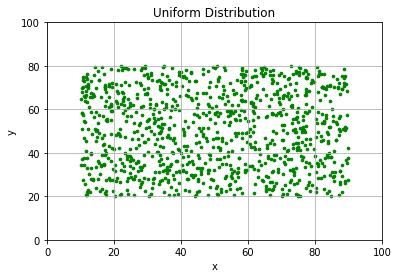

In [4]:
#Didn't work how I thought it would- instead of saying splot = plt.scatter 
#and calling methods on splot, you just say plt.scatter and call them on plt
plt.scatter(df_uniform["x"], df_uniform["y"],s=7,c="g")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Uniform Distribution")
plt.grid(True)
plt.axis([0,100,0,100])

### 6) [P] Generate a data frame called df_normal with 1000 observations, two variables names x and y again. This time, x should be generated from a normal distribution with mean 50 and standard deviation 15, and y with mean 50 and standard deviation 5. Again, show the head() of df_normal.

In [5]:
ind = range(1000)
x = pd.Series(np.random.normal(loc=50,scale=15,size=1000), index=ind, name='x')
y = pd.Series(np.random.normal(loc=50,scale=5,size=1000), index=ind, name='y')
df_normal = pd.DataFrame([x, y])
df_normal = df_normal.T #I get the impression you wanted it in this format
df_normal.head()

,x,y
0,71.182357,49.123879
1,56.954296,54.579597
2,30.306787,47.688809
3,53.658082,50.707723
4,71.580015,51.934152


### 7) [P] Repeat your scatterplot above with df_normal . Use a different color point, and title your plot accordingly.

[0, 100, 0, 100]

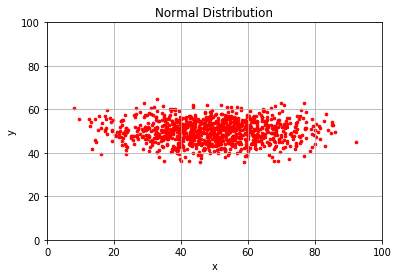

In [6]:
plt.scatter(df_normal["x"], df_normal["y"],s=7,c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Normal Distribution")
plt.grid(True)
plt.axis([0,100,0,100])

### 8) [P] Generate a single figure that contains two axes that are adjacent to each other. You should have:
### a. at least one shared axis
### b. appropriate axis labels
### c. make the range of the axis on both plots the same
### d. display a legend on each to be sure both are labeled correctly as "normal" or "uniform"
### e. One title at the top

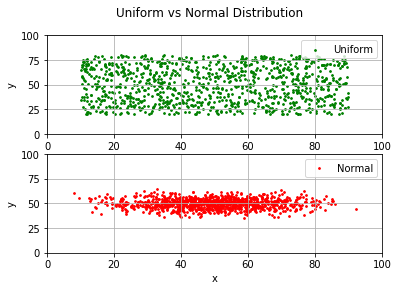

In [7]:
#NOT DONE- X axis not shared
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex="col", sharey=True)
plt.suptitle("Uniform vs Normal Distribution")


plt.subplot(211)
plt.scatter(df_uniform["x"], df_uniform["y"],s=3,c="g", label="Uniform")
plt.legend()
plt.ylabel("y")
plt.grid(True)
plt.axis([0,100,0,100])


plt.subplot(212)
plt.scatter(df_normal["x"], df_normal["y"],s=3,c="r", label="Normal")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis([0,100,0,100])

plt.show()

### 9) [P] Display both df_uniform and df_normal on one shared plot, with an appropriate legend

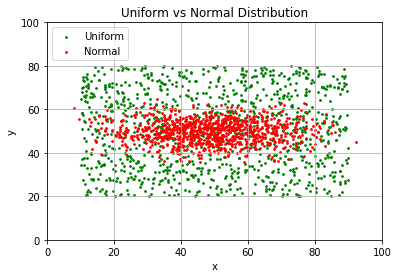

In [8]:
plt.scatter(df_uniform["x"], df_uniform["y"],s=3,c="g", label="Uniform")
plt.scatter(df_normal["x"], df_normal["y"],s=3,c="r", label="Normal")

plt.title("Uniform vs Normal Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis([0,100,0,100])
plt.legend(loc="upper left")

plt.show()

### As you might surmise, there are an enormous number of other types of plots you can use to understand your data. Matplotlib is quite impressive, and gives you great control for creating publication quality graphs. However, its interface is complex.
### During our EDA phase, we often just want quick ways to explore our data and understand our distributions. Fortunately, pandas has a nice interface to matplotlib that makes it quite easy to generate some quick plots. We will look at those next.

### 10) [M] What is a histogram? In your answer, in addition to defining it, please clearly indicate what type of data its good for, and whether it's good for one variable or to show relationships between multiple variables.

#### A histogram is a display using bars of different heights, each bar grouping numerical data into ranges. The height of the bar is proportional to how many datapoints falls into that range. It is good for continuous data- we can't make a readable graph with 10,000 tick marks, so instead we divide the data into 1-1000, 1001-2000, ... 9001-10,000 and make a histogram. It is best used with one variable.

### 11) [P] The pandas DataFrame class has a useful interface to matplotlib that will help you generate some quick plots as you explore your data. To get you started, generate a histogram of both the x and y variables for df_uniform. Use 30 bins, and set the range of both variables to be 0 – 100. Repeat this exercise on df_normal. (HINT:Use the hist() method of DataFrame.)

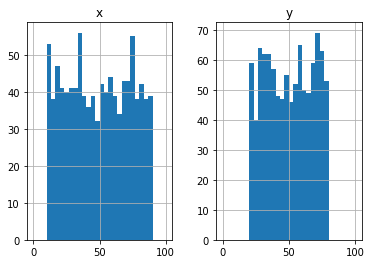

In [9]:
dfU_hist = df_uniform.hist(bins=30,range=[0,100])

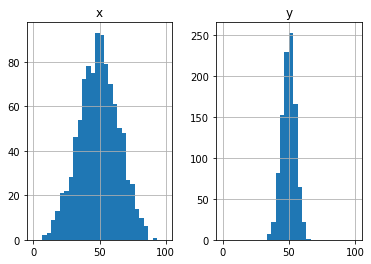

In [10]:
dfN_hist = df_normal.hist(bins=30,range=[0,100])

### 12) [M] What is a quantile?

#### A quantile is where a sample is divided into equal-sized, adjacent, subgroups. It can also refer to dividing a probability distribution into areas of equal probability. https://www.statisticshowto.datasciencecentral.com/quantile-definition-find-easy-steps/

### 13) [M] In terms of quantiles, what is a quartile? What about a percentile? What is an Inter-quartile range (IQR)?

#### A quartile is dividing the distribution into 4 equal parts.
#### A percentile is dividing into 100 equal parts.
#### The IQR describes the distribution of data by finding the difference between the 75th percentile and 25th percentile. If the difference between them is very small then the middle 50% of the data is highly grouped, if it is large the data is spread out.

### 14) [M, P] Read about the quantile() method for data frames, and use it to numerically show the 25th, median, and 75th percentiles, and compute the IQR (Inter-quartile range) for both variables, on both data frames. Compare and contrast.

#### The IQR of the normal data is much smaller, which makes sense as the data is clustered around a central value. 

In [11]:
#If I had thought of it earlier I would have put this in a dataframe, not printed it
#25th, x y, uniform
u25 = df_uniform.quantile(q=0.25)
print("Uniform:\n" + str(u25), '\n')
#median, x y, uniform
u50 = df_uniform.quantile()
print("Uniform:\n" + str(u50), '\n')
#75th, x y, uniform
u75 = df_uniform.quantile(q=0.75)
print("Uniform:\n" + str(u75), '\n')
#IQR, x y, uniform
print("IQR:\n" + str(u75-u25), '\n')

#############################################
#25th, x y, normal
# A way to show just x: df_normal["x"].quantile(q=0.25)
n25 = df_normal.quantile(q=0.25)
print("Normal:\n" + str(n25), '\n')
#median, x y, normal
n50 = df_normal.quantile()
print("Normal:\n" + str(n50), '\n')
#75th, x y, normal
n75 = df_normal.quantile(q=0.75)
print("Normal:\n" + str(n75), '\n')
#IQR, x y, normal
print("IQR:\n" + str(n75-n25), '\n')

Uniform:
x    29.101179
y    34.537015
Name: 0.25, dtype: float64 

Uniform:
x    49.646841
y    50.428786
Name: 0.5, dtype: float64 

Uniform:
x    70.362502
y    66.256670
Name: 0.75, dtype: float64 

IQR:
x    41.261323
y    31.719655
dtype: float64 

Normal:
x    39.377233
y    46.483046
Name: 0.25, dtype: float64 

Normal:
x    49.280199
y    50.100092
Name: 0.5, dtype: float64 

Normal:
x    59.737851
y    53.414954
Name: 0.75, dtype: float64 

IQR:
x    20.360617
y     6.931908
dtype: float64 



### 15) [M] There are many ways to define what we mean by an outlier. A very common technique is known as the IQR rule for outliers. What is a definition of an outlier in terms of IQR? (Your answer should use 1.5 * IQR .)

#### In terms of IQR, a value is an outlier if it is more than 1.5\*IQR + Q3 or less than Q1 - 1.5\*IQR.

### 16) [P] Write a function called IQR_outlier_limits that takes a dataframe as input, and computes the minimum and maximum outlier thresholds for each variable (numeric only assumed), stored in a data frame that is returned as a result. For example:
### (The results will depend on the actual distribution of your random data. However, the results should make sense! Verify your results to ensure that you have some observations that are outliers. Your normal data should have some. Your uniform data should not.)

In [12]:
def IQR_outlier_limits(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    max_thresh = q3 + 1.5*IQR
    min_thresh = q1 - 1.5*IQR
    max_thresh.name = "max_out"
    min_thresh.name = "min_out"
    thresh_df = pd.DataFrame([max_thresh, min_thresh])
    return thresh_df

### 17) Use your function you defined above to determine the outliers for df_normal and df_uniform, if any. (HINT: You should get at least a few outliers for df_normal)

In [13]:
IQR_outlier_limits(df_uniform)

,x,y
max_out,132.254487,113.836153
min_out,-32.790805,-13.042468


In [14]:
IQR_outlier_limits(df_normal)

,x,y
max_out,90.278777,63.812816
min_out,8.836307,36.085185


### 18) [M] What is a box plot? (A.k.a boxplot, box-and-whisker plot). In your answer, please clearly indicate what it is, what type of data its good for, and whether it's good for one variable or to show relationships between multiple variables.

#### A box plot is a 5 number summary of a dataset. It shows the minimum, first quartile, median, third quartile, and maximum. It is very descriptive way to show the distribution of a dataset. A single box plot is good for one variable but multiple box plots can be comapred against each other.

### 19) [P] Again, use the DataFrame plotting interface to generate a box plot on both x and y variables of both df_uniform and df_normal.

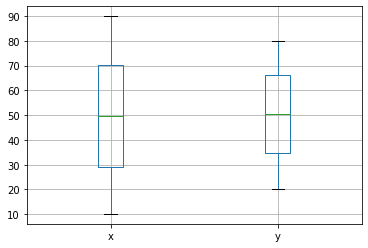

In [15]:
#Could get something similiar with df.plot.box()
df_uniform.boxplot()

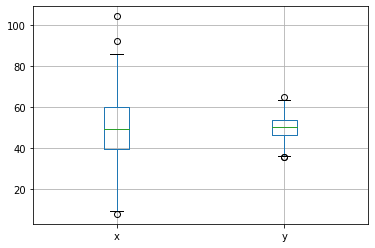

In [16]:
df_normal.boxplot()

### 20) [M] From your understanding of a box plot, summarize the distribution of these data, comparing the uniform and the normal distributed data. You should be using the correct terminology, meaning, interpreting the box plot results in terms of quartiles, outliers, etc.

#### The uniform set box plots are as expected: there is an equal distance between minimum and Q1, Q1 and median, median and Q3, and Q3 and maximum, for both x and y. By the IQR rules neither variable has any outliers.
#### The normal set box top shows high center grouping by a small box, and far off maximum/minimum, especially for x. The box plot shows several outliers for x and y. 

### 21) [M] What is a density plot? In your answer, please clearly indicate what it is, the type of data you use it for, and whether it's good for one variable or to show relationships between multiple variables.

#### Density plots are like a smoothed histogram. They are used to study the distribution of a numerical variable. A single plot is best for one variable. 

### 22) [P] Generate a density plot for both x and y variables of both df_uniform and df_normal.

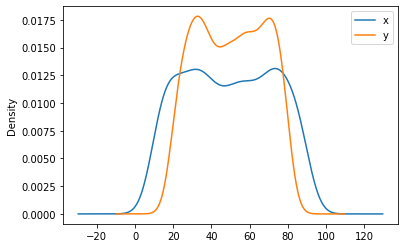

In [17]:
df_uniform.plot.density()

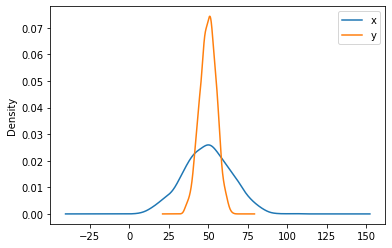

In [18]:
df_normal.plot.density()

### 23) [M] Interpret the density plot results

#### As expeceted, the normal dataset is heavily centered around the middle value of 50. The uniform density plot is not as strict as I would expect, I thought is would be more of a straight line around the top. 

### 24) [P] Go back to the describe() method you learn about in previous labs. Show the results of describe() for both data frames. This stills you much information about the distribution of the data.

In [19]:
df_uniform.describe()

,x,y
count,1000.000000,1000.000000
mean,49.360418,50.311108
std,23.361352,17.612472
min,10.140772,20.018029
25%,29.101179,34.537015
50%,49.646841,50.428786
75%,70.362502,66.256670
max,89.891129,79.999388


In [20]:
df_normal.describe()

,x,y
count,1000.000000,1000.000000
mean,49.376425,49.879051
std,14.934762,5.134885
min,7.917264,35.688092
25%,39.377233,46.483046
50%,49.280199,50.100092
75%,59.737851,53.414954
max,104.137411,64.735494


### 25) [M] What is a quantile-quantile plot (Q-Q plot)? (Wikipedia provides a good answer for this one https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot )

#### A Q-Q plot compares two probability distributions by plotting their quantiles against each other. If the distributions are similar, the points will approximately lie on the line y=x. If they are linearly related, the will lie on a line but not necessarily y=x.

### 26) [P] Load the scipy.stats package as stats. Look up the API and read about the probplot function. (See http://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot ) This can generate a Q-Q plot for you quite easily. Generate a Q-Q plot for a sample of 100 points from the x-variable  df_uniform. Do the same for df_normal. For illustrative purposes, assume your distribution is normal for both plots (even though we know it is not!)

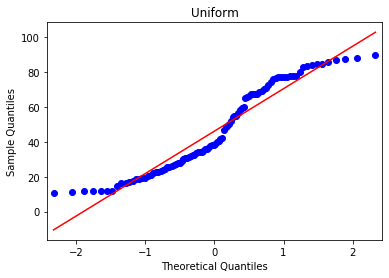

In [21]:
import scipy.stats as stats
import statsmodels.api as sm

un_100 = df_uniform["x"].sample(100)
norm_100 = df_normal["x"].sample(100)

sm.qqplot(un_100, line='s') #Comparison to normal is the default
plt.title("Uniform")
plt.show()

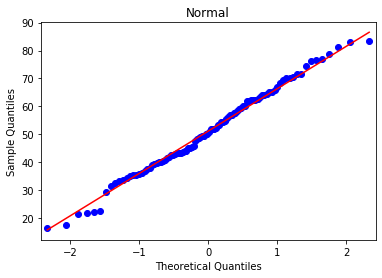

In [22]:
sm.qqplot(norm_100, line='s')
plt.title("Normal")
plt.show()

### 27) [M] Compare and contrast your resulting plot. Does the output suggest that one is indeed normally distributed, and the other is not?

#### The uniform plot compared to the standardized line is not straight, and is not normal. The normal plot follows a line closely, which suggests it is normal.

### 28) [P] Repeat the experiment, showing a Q-Q plot for 100 samples of each dataset. However, now assume the distribution is uniform.

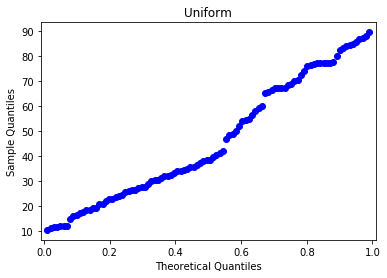

In [23]:
sm.qqplot(un_100, dist="uniform")
plt.title("Uniform")
plt.show()

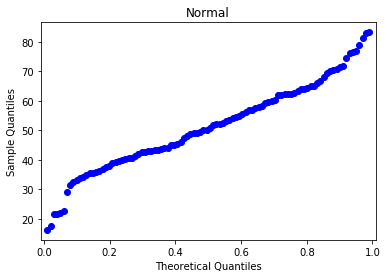

In [24]:
sm.qqplot(norm_100, dist="uniform")
plt.title("Normal")
plt.show()

### 29) Again, compare the plots. Does the output suggest one is indeed normally distributed and the other is not?

#### This time the uniform plot is much closer to a straight line, suggesting it is uniformly distributed. The normal plot is not a straight line, especially at the edges, and is not uniform.

## Part II - seaborn

### seaborn is a data visualization package built on top of matplotlib. (If you did not, go back to the beginning of this lab and be sure to install the packages required!) Matplotlib is a solid graphics engine that can handle a LOT of different techniques. Seaborn takes matplotlib to the next level of modernization, makes many plotting tasks easier, and generally, it adds some seriously nice attractiveness.
### Before you begin, please take the time to read through https://seaborn.pydata.org/introduction.html. Then, just so you have a sense of what some of its capabilities are, browse through the various tutorials on https://seaborn.pydata.org/tutorial.html . There are a LOT of different tutorials here. Seaborn focuses on helping you plot statistical relationships in your data, which is precisely what we're after when we are doing EDA with our data!

### 30) [P] Show a single scatterplot of df_normal using sns. Change the default color and point type that is used in the plot.

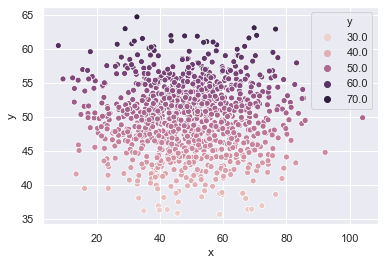

In [25]:
#sns.scatterplot(data=df_normal, hue="x", legend="full" )
sns.set(style="darkgrid")
sns.scatterplot(x=df_normal["x"], y=df_normal["y"], data=df_normal, hue="y")#Couldn't figure out how to change point type


### For the remainder of these exercises, you are required to use seaborn, but select at least two aspects of your plot to make them unique. It could be the color of the point, size, background, grid, etc. etc. There are many choices. Use these exercises to learn about this wonderful visualization framework, and to tap into the artist in you!

### 31) [P] Show a scatterplot of both df_uniform and df_normal side by side on the same figure

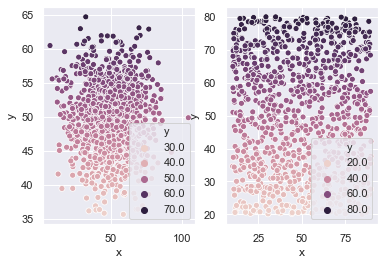

In [28]:
#plt.style.use('seaborn-white')
#https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
#Works, but uses matplotlib, not just seaborne
fig, ax =plt.subplots(1,2)
sns.scatterplot(x=df_normal["x"], y=df_normal["y"], data=df_normal, hue="y", ax=ax[0])
sns.scatterplot(x=df_uniform["x"], y=df_uniform["y"], data=df_uniform, hue="y", ax=ax[1])
#fig.show()

### 32) [P] Show the distribution of only the x variable for both df_uniform and df_normal, with a density curve and a rugplot at the bottom. (Look at sns.distplot)

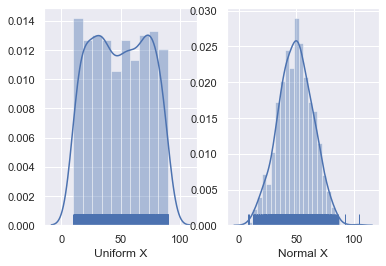

In [32]:
fig, ax =plt.subplots(1,2)
sns.distplot(a=df_uniform["x"], kde=True, rug=True, ax=ax[0], axlabel = "Uniform X")
sns.distplot(a=df_normal["x"], kde=True, rug=True, ax=ax[1], axlabel = "Normal X")

### 33) [M] What is a jointplot in Seaborn?

#### "Draw a plot of two variables with bivariate and univariate graphs."
#### "Seaborn’s jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid." - http://alanpryorjr.com/visualizations/seaborn/jointplot/jointplot/
[Example](http://alanpryorjr.com/visualizations/seaborn/jointplot/output_12_0.png)

### 34) [P] Use sns.jointplot to show the bivariate distribution of x and y for df_uniform and df_normal

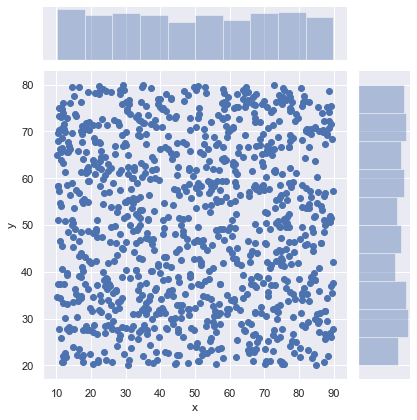

In [37]:
sns.jointplot(x=df_uniform["x"], y=df_uniform["y"], data=df_uniform)

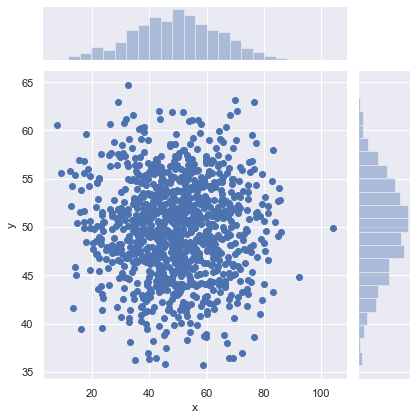

In [35]:
sns.jointplot(x=df_normal["x"], y=df_normal["y"], data=df_normal)

### 35) [P] Show a hexbin plot using sns.jointplot for df_normal

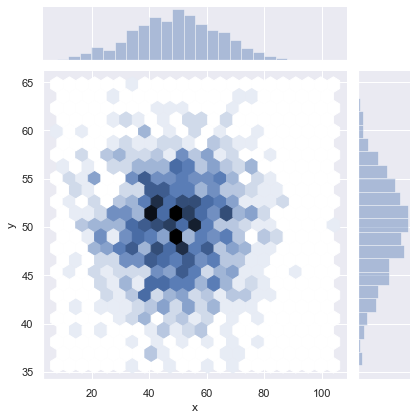

In [41]:
sns.jointplot(x=df_normal["x"], y=df_normal["y"], data=df_normal, kind='hex')

## Part III – Some basic data preprocessing

### 36) [P] Create an additional variable in df_uniform called x_fac1 that represents a factor with 3 levels, "X1", "X2", and "X3". You should discretize according to equal width bins over the distribution of x. (Divide the range of x into three.)

In [40]:
#I don't really get what this means.

### 37) [P] Create an additional variable in df_uniform called x_fac2 that represents a factor with 3 levels, "X1", "X2", and "X3". This time, you should discretize using equal depth bins over the distribution of x. Select your division criteria such that there are an equal number of data in each bin. Verify that the distribution of your data each has the same number of data (within 1).

### 38) [P] Create a side by side scatter plot showing the distribution of df_uniform, using x_fac1 as the color for one plot, and x_fac2 as the color for your other plot.